 # TP6: Apprentissage profond(Deep learning)
 ## TP6.3 Un réseau MLP  : Régression logistique  
 Dans ce TP, on reprendra les mêmes notions que les TP 6.1 et 6.2 que nous appliquerons à un problème de classification.


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split    



In [16]:
from tensorflow.keras import backend as K

def f1_score(y_true, y_pred):
    # Define the true positives, false positives and false negatives
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    fp = K.sum(K.round(K.clip(y_pred - y_true, 0, 1)))
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)))

    # Calculate the precision and recall
    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())

    # Calculate the F1 score
    f1_score = 2 * ((precision * recall) / (precision + recall + K.epsilon()))

    return f1_score

## Réseau de neurones avec une sortie sigmoide  sigmoïde
La fonction implémentée par un neurone/unité avec une activation sigmoïde est la même que dans le chapitre 3, la régression logistique :
$$ f_{\mathbf{w},b}(x^{(i)}) = g(\mathbf{w}x^{(i)} + b) \tag{2}$$
où $$ f_{\mathbf{g(x) = sigmoïde(x) }$$ 


### 1 Le DataSet
On utilisera le Dataset titanic, on fera de la classification

In [17]:
# le dataset titanic 
import pandas as pd 
titanic = pd.read_csv('../../data/titanic.csv')

# On prend juste une partie du fichier.
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age']]
#  on regrade les chance de Survived  en fonction des autres features.
X_features=['Pclass', 'Sex', 'Age']
titanic.dropna(axis=0, inplace=True)
titanic['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic.head()

y = titanic['Survived'] # récupérer la colonne survived et la mettre dans y

# récuperer le reste des données dans X utiliser la fonction titanic.drop ???, ??? )
X = titanic.drop('Survived', axis=1)



## 2 Préparation des données

#### 2.1. Split des données (on fait du 80%, 20%)

In [18]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### 2.2  Normalisation des données

In [19]:
## On peut utuliser une simple normalisation (x-mu)/ecart type)
mean = X_train.mean()
std  = X_train.std()
X_train = (X_train - mean) / std
X_test  = (X_test  - mean) / std

#display(X_train.describe().style.format("{0:.2f}").set_caption("After normalization :"))
display(X_test.head(5).style.format("{0:.2f}").set_caption("Few lines of the dataset :"))
 

,Pclass,Sex,Age
149,-0.27,-0.75,0.81
407,-0.27,-0.75,-1.83
53,-0.27,1.32,-0.07
369,-1.46,1.32,-0.41
818,0.93,-0.75,0.88


### 3. Définition du modèle de régression linaire
La fonction mise en œuvre par un neurone sans activation est la même que la régression logistique du chapire 3.:
$$ f_{\mathbf{w},b}(x^{(i)}) = g(\mathbf{w}x^{(i)} + b) \tag{2}$$
où $$  g(x) = sigmoïd(x) $$


Choix des fonctions du modèles 
- [Optimizer:](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers )
- [Activation:](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
- [Loss :](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
- [Metrics :](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)
    


`model.summary()` indique les couches et le nombre de paramètres du modèle. 

### 3.1 Un réseau  à 1 neurone. 

Un réseau à un neurone, la sortie dans ce cas est une sigmoïde car o est dans un problème de classification

In [20]:
# Option 1 
m = X_train.shape[1]
model = tf.keras.Sequential ([
        tf.keras.layers.Input(m, name="InputLayer"),
        tf.keras.layers.Dense(units=1, activation = 'sigmoid',name='output')
])


In [21]:
#Compiler le modèle
model.compile(optimizer='adam',
              loss= 'BinaryCrossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 3.2 Un modèle plus complexe 
#### Question : construire un modèle ayant l'architecture suivante ?
- une couche d'entrée
- une couche cachée à 32 neuronesavec une activation relu
- une couche de sortie 

In [22]:
# Option 1 : Une autre façon de construire un réseau



In [23]:
#Compiler le modèle



#### On peut visualiser les paramètres du réseau les W1 et b.

In [24]:
W1, b1 = model.get_layer("output").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)


W1(3, 1):
 [[-1.0648855 ]
 [ 0.17737365]
 [ 1.0887128 ]] 
b1(1,): [0.]


### 4. Entrainement du modèle (Model training)

In [25]:
# Entrainement du modele



#### Vislauliser les métriques utilisées lors de l'apprentissage

#### Visualiser les patramètres appris

### 5. Evaluation des performances du modèle 


### Historique du Training (training history)
Quel était le meilleur résultat prendant l'entrainement

In [26]:
import pandas as pd 
df=pd.DataFrame(data=history.history)
display(df)

NameError: name 'history' is not defined

#### Visaliser les performances du modèle 

#### Prédiction
Les valeurs sorties par le modèle sont des réels compris entre 0 et 1 (si vous utilisez la sigmoide). Or nous sohhatons avoir une valeur 1 ou 0 ?

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(X_test)

# Predict probabilities
y_pred = model.predict(X_test)

# Get class labels
#y_classes = np.argmax(y_pred, axis=-1)
y_classes = np.where(predictions > 0.5, 1, 0)

cm = confusion_matrix(y_test, y_classes)

sns.heatmap(cm, annot=True, annot_kws={"size": 12}) # font size
plt.show()


### Save History and model

In [ ]:
#Saving:



In [ ]:
#Loading:



### 6. Faire des prédictions

In [ ]:
#Small Sata set


In [ ]:
predictions = model.predict( my_data )
print("Prediction : {:.2f} K$".format(predictions[0][0]))
print("Reality    : {:.2f} K$".format(survived))


## Questions:
La suite du TP porte sur les données train.csv le fichier ci-dessous).
- Définir le modèle qui permet de trouver les meilleures Prédictions.

Je rappelle que la définition du modèle dépend :
- 1- l'architecture
- 2- l'optimiseur
- 3- l'entrainement

Faire varier ces différents paramètres. 

<span style="color:green"> <strong>Le meilleur modèle sera récompensé.  
    <strong></span>


#### Saisir Ici la valeur de l'accuracy. 
<span style="color:green"> Accuracy :  .....
  <strong></span>

In [27]:
# Lecture du dataset n permet de limiter le nombre de lignes à lire
# Pour faciliter les tests
import pandas as pd 
def load_data(n):
    data = pd.read_csv('../../data/train.csv')
    return data[0:n]

# le -1 du load_data(-1) veut dire on prend toutes les lignes 
data=load_data(-1)
data.dropna(axis=0, inplace=True)
y = data['smoking'] # récupérer la colonne survived et la mettre dans y
# récuperer le reste des données dans X utiliser la fonction titanic.drop ???, ??? )
X = data.drop('smoking', axis=1)

In [28]:
# Normalisation des données
mean = X.mean()
std  = X.std()
X = (X - mean) / std

In [29]:
# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Définition du modèle
m = X_train.shape[1]
model = tf.keras.Sequential ([
        tf.keras.layers.Input(m, name="InputLayer"),
        tf.keras.layers.Dense(units=1, activation = 'sigmoid',name='output')
])

In [31]:
# Compiler le modèle
model.compile(optimizer='adam',
              loss= 'BinaryCrossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 output (Dense)              (None, 1)                 24        
                                                                 
Total params: 24 (96.00 Byte)
Trainable params: 24 (96.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# Entrainement du modele
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
3186/3186 [==============================] - 7s 2ms/step - loss: 0.5153 - accuracy: 0.7357 - val_loss: 0.4895 - val_accuracy: 0.7478
Epoch 2/100
3186/3186 [==============================] - 4s 1ms/step - loss: 0.4924 - accuracy: 0.7484 - val_loss: 0.4896 - val_accuracy: 0.7495
Epoch 3/100
3186/3186 [==============================] - 4s 1ms/step - loss: 0.4924 - accuracy: 0.7490 - val_loss: 0.4892 - val_accuracy: 0.7481
Epoch 4/100
3186/3186 [==============================] - 4s 1ms/step - loss: 0.4922 - accuracy: 0.7488 - val_loss: 0.4899 - val_accuracy: 0.7473
Epoch 5/100
3186/3186 [==============================] - 4s 1ms/step - loss: 0.4923 - accuracy: 0.7481 - val_loss: 0.4889 - val_accuracy: 0.7496
Epoch 6/100
3186/3186 [==============================] - 4s 1ms/step - loss: 0.4923 - accuracy: 0.7486 - val_loss: 0.4892 - val_accuracy: 0.7495
Epoch 7/100
3186/3186 [==============================] - 4s 1ms/step - loss: 0.4922 - accuracy: 0.7483 - val_loss: 0.4891 - val_ac

In [33]:
# Evaluation du modèle
model.evaluate(X_test, y_test)

996/996 [==============================] - 1s 996us/step - loss: 0.4932 - accuracy: 0.7458


[0.49317944049835205, 0.7458478808403015]

In [34]:
# Prédiction
y_pred = model.predict(X_test)

996/996 [==============================] - 1s 985us/step


996/996 [==============================] - 1s 1ms/step


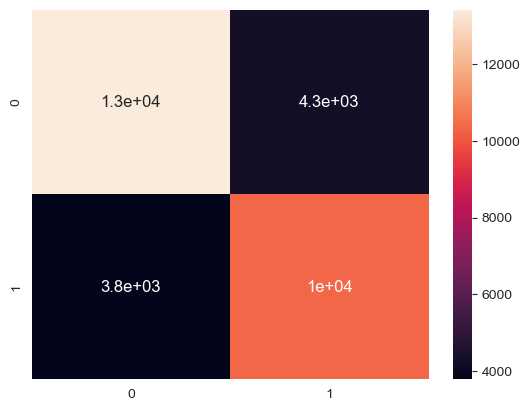

In [35]:
# Visualisation des résultats
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(X_test)

# Predict probabilities
y_pred = model.predict(X_test)

# Get class labels
#y_classes = np.argmax(y_pred, axis=-1)
y_classes = np.where(y_pred > 0.5, 1, 0)

cm = confusion_matrix(y_test, y_classes)

sns.heatmap(cm, annot=True, annot_kws={"size": 12}) # font size
plt.show()